In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import scipy.optimize as opt
from scipy.optimize import curve_fit
import os
import re


In [2]:
def powerlaw(t,K,n,Af,tau):
    return Af*(1-np.exp(-K*np.power(t+tau,n)/Af))#/Af))


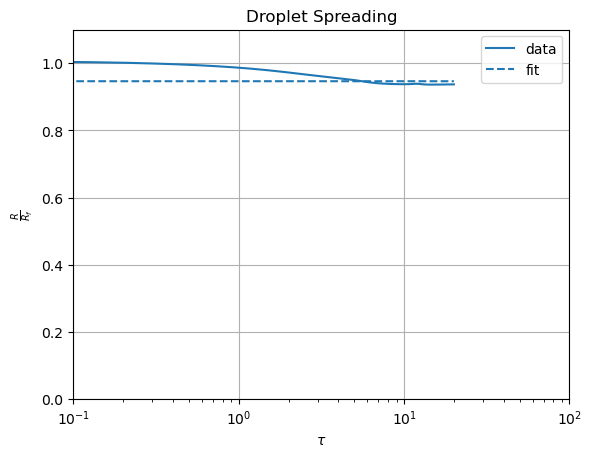

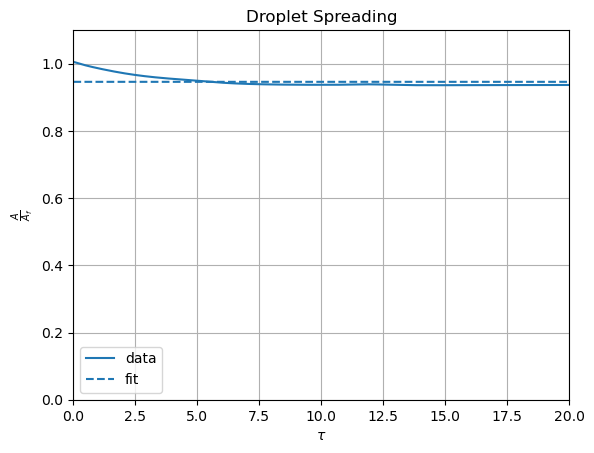

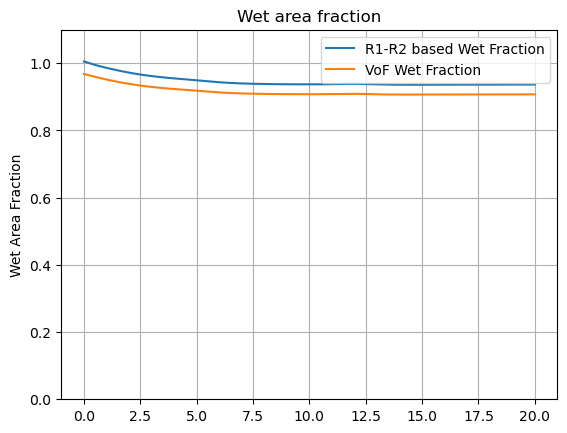

In [4]:
fit_param=np.zeros([1,4])

temp=pd.read_csv('./monitor/dropinfo',header=0,delimiter='\\s+')#,skiprows=1)
temp2=pd.read_csv('./monitor/simulation',header=0,delimiter='\\s+')#,skiprows=1)
data=temp[1:].astype('float32') # Drop first row and interpret data as floating point numbers. 
data2=temp2[1:].astype('float32') # Drop first row and interpret data as floating point numbers. 
    # === Plot Data === #
xdata=data['Time'].to_numpy()
ydata=data['WetAreaFract'].to_numpy()
ydata2=data['VoF_WF'].to_numpy()

ydata=ydata
p=plt.semilogx(xdata,ydata,label='data')
    # === Fit model === #
    #popt, pcov = curve_fit(powerlaw, data['Time'], np.pi*np.power(data['Wetted'],2),[1,0.5,1,8])
popt, pcov = curve_fit(powerlaw, xdata, ydata,bounds=(10**-3,[10,10,10,2]))
fit_param[0,:]=popt
p=plt.semilogx(xdata,powerlaw(xdata,popt[0],popt[1],popt[2],popt[3]),'--',color=p[0].get_color(),label='fit')


plt.ylim([0,1.1])
plt.xlim([1e-1,1e2])
plt.title('Droplet Spreading')
plt.xlabel(r'$\tau$')

plt.ylabel(r'$\frac{R}{R_f}$')
plt.legend()
plt.grid()#True,which='Both')
plt.show()

s=plt.plot(xdata,ydata,label='data')
s=plt.plot(xdata,powerlaw(xdata,popt[0],popt[1],popt[2],popt[3]),'--',color=p[0].get_color(),label='fit')

plt.ylim([0,1.1])
plt.xlim([0,20])
plt.title('Droplet Spreading')
plt.xlabel(r'$\tau$')
plt.ylabel(r'$\frac{A}{A_f}$')
plt.legend()
plt.grid()#True,which='Both')
plt.show()

plt.plot(xdata,ydata,label='R1-R2 based Wet Fraction')
plt.plot(xdata,ydata2,label='VoF Wet Fraction')
plt.legend()
plt.title('Wet area fraction')
plt.ylim([0,1.1])
plt.ylabel('Wet Area Fraction')
plt.grid()
plt.show()

    

In [ ]:
#K,n,A_f,tau
fit_param

In [ ]:
s=plt.plot(xdata,data['Totalvol'].to_numpy()*3/4/np.pi,label='data')
#plt.ylim([40,90])
plt.grid()